https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html#sphx-glr-auto-examples-segmentation-plot-regionprops-py

In [16]:
import json # For dealing with metadata
import os # For file level operations
import time # For timing demonstrations
import datetime # To demonstrate conversion between date and time formats
import glob
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
import seaborn as sns

import sys
sys.path.append('/Image/helper_functions/')
from visualization_functions import show_images

<KeysViewHDF5 ['0-SrRuO3', '0-SrRuO3_Pre']>


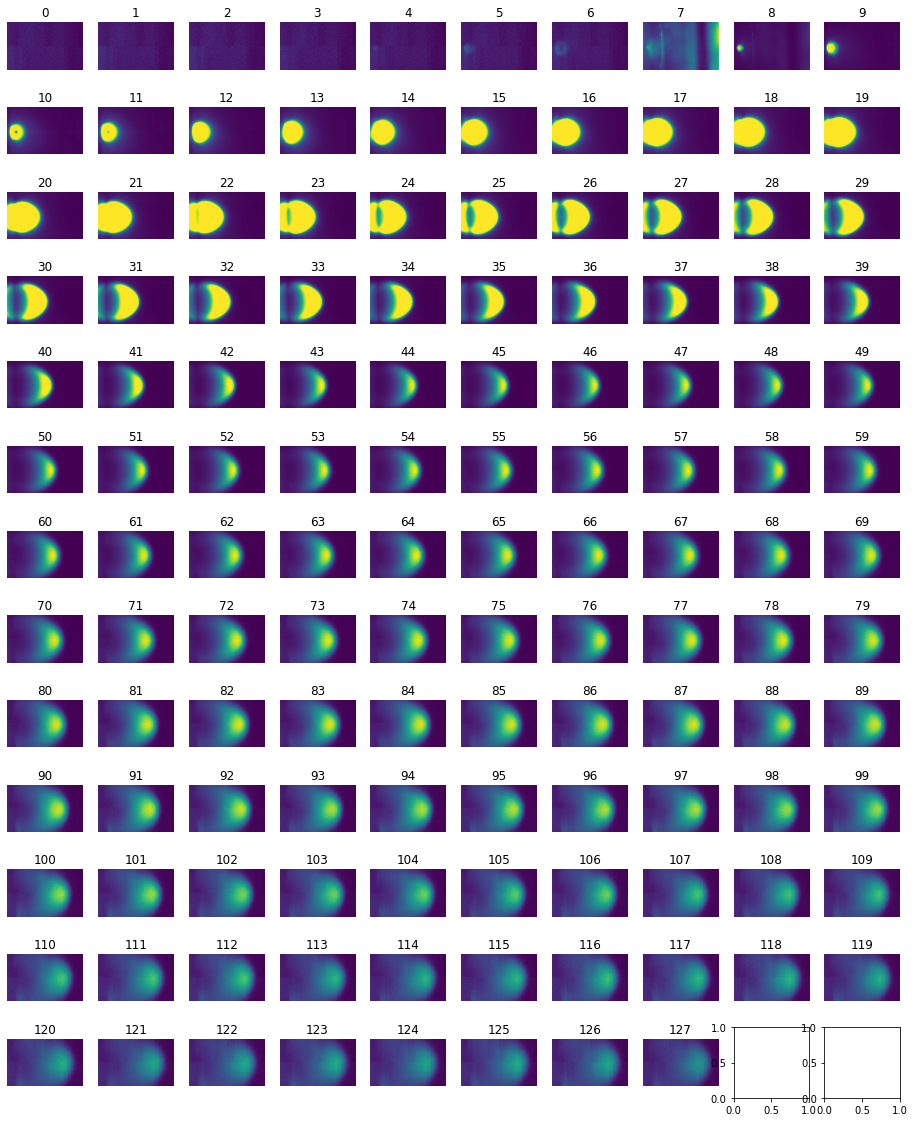

In [2]:
ds_path = '/Image/YG004_Yichen_Guo_04052022.h5'
class_name = 'PLD_Plumes'
ds_name = '0-SrRuO3'
show_h5_dataset_name(ds_path, class_name)
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [23]:
ds_path = '/Image/YG004_Yichen_Guo_04052022.h5'
ds_name = '0-SrRuO3'
condition='100mj-700c-200mtorr-berkeley_target'

df = plumes_to_df(ds_path, ds_name, condition)
df.sample(n=20)
df.head()
df[120:140]
df.tail()

,condition,metric,growth_index,time_step,a.u.
40955,100mj-700c-200mtorr-berkeley_target,velocity,31,123,212.0
40956,100mj-700c-200mtorr-berkeley_target,velocity,31,124,212.0
40957,100mj-700c-200mtorr-berkeley_target,velocity,31,125,212.0
40958,100mj-700c-200mtorr-berkeley_target,velocity,31,126,212.0
40959,100mj-700c-200mtorr-berkeley_target,velocity,31,127,212.0


# visualize metrics

In [ ]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
                'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
                'eccentricity', 'perimeter', 'velocity'] 
plot_metrics(df, metrics_name, label_with='growth_index')

area


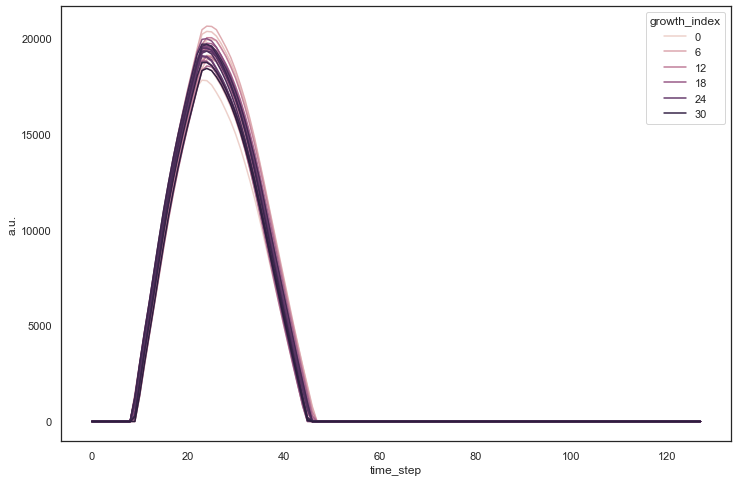

area_filled


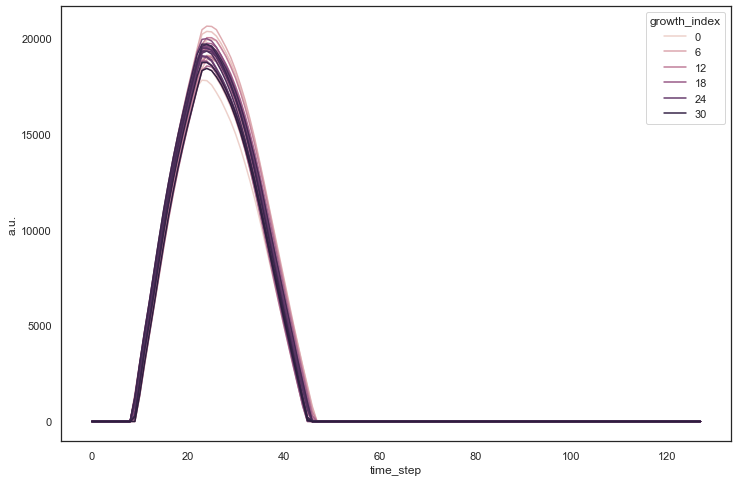

axis_major_length


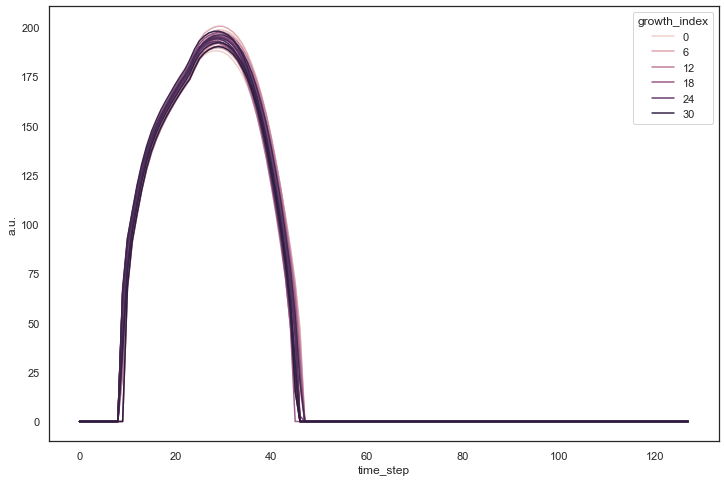

axis_minor_length


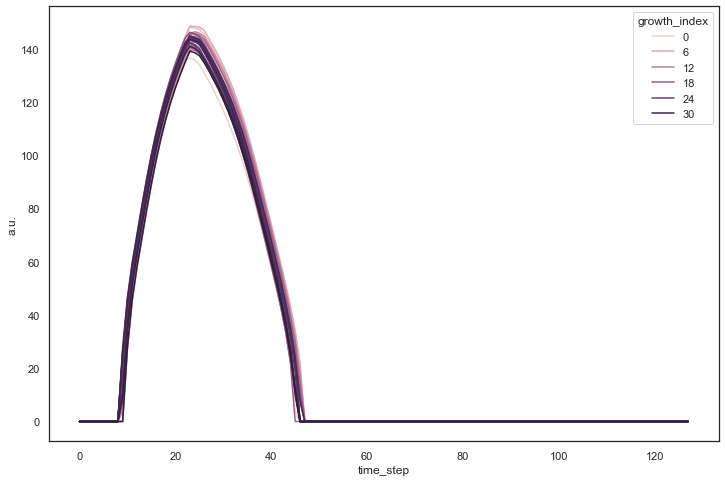

centroid-1


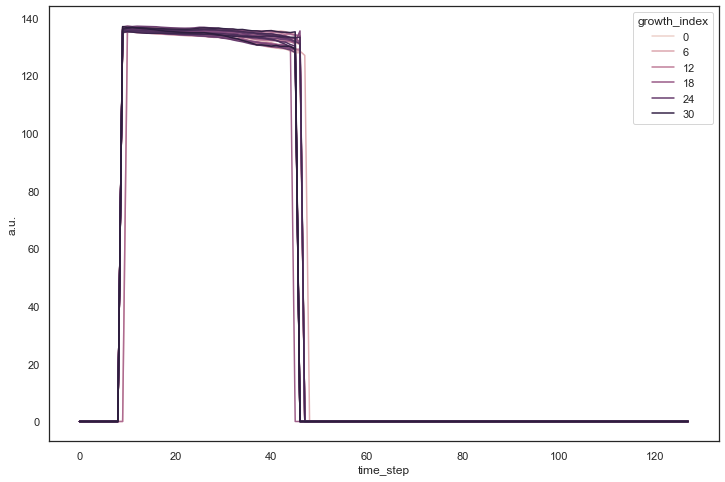

centroid-2


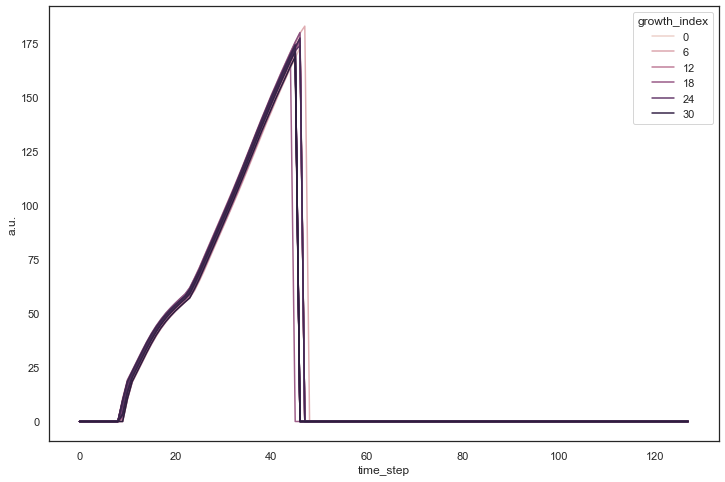

orientation


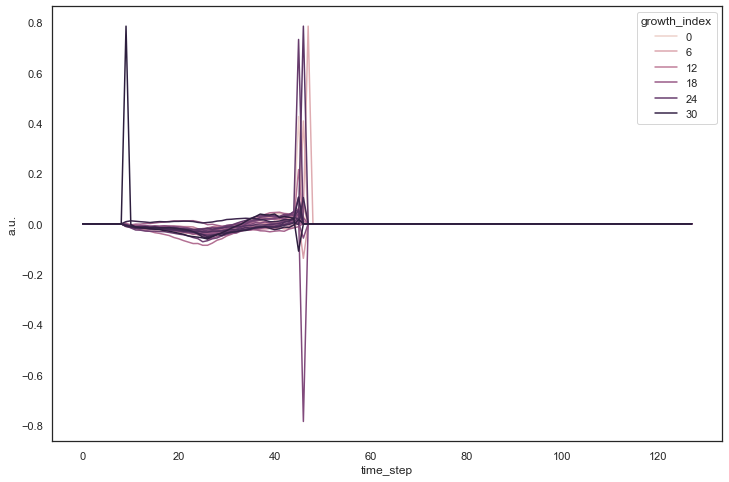

eccentricity


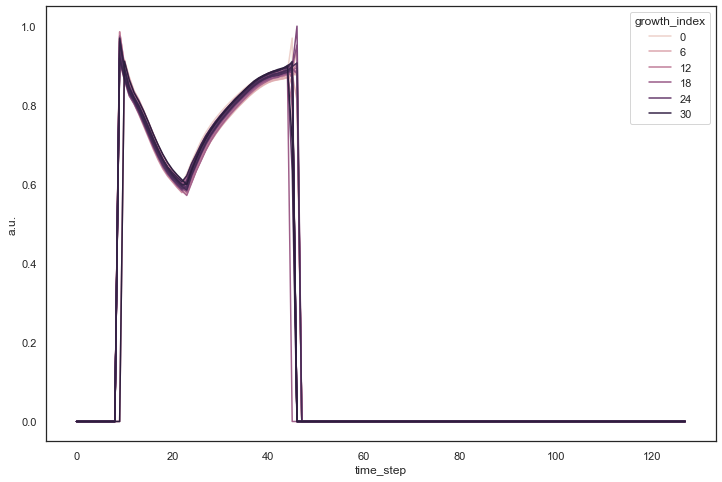

perimeter


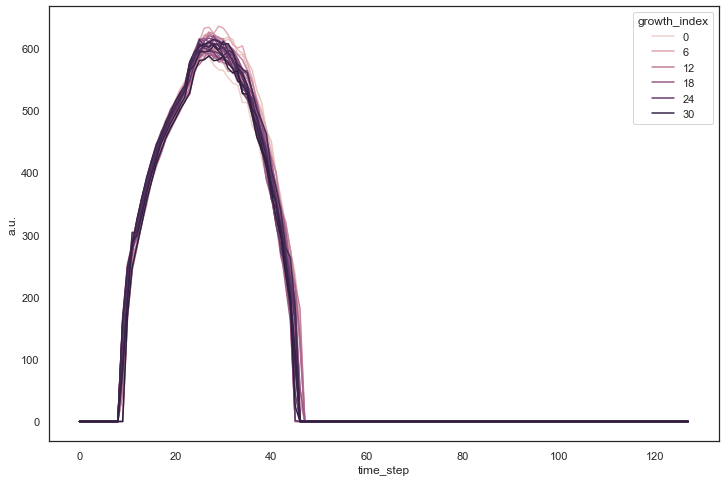

velocity


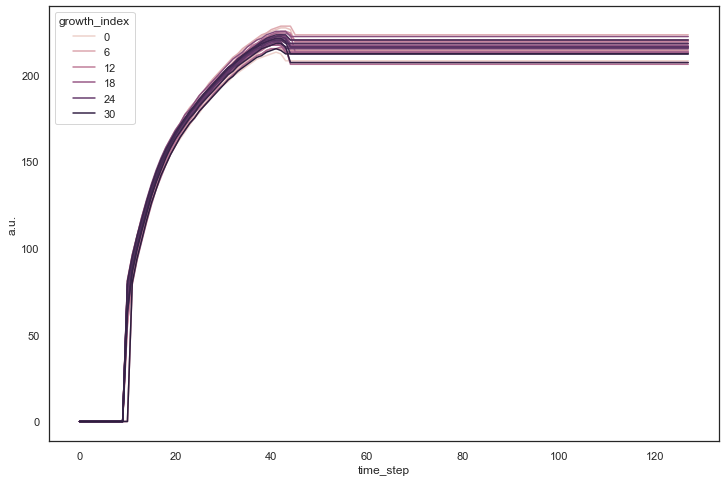

In [25]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
                'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
                'eccentricity', 'perimeter', 'velocity'] 
plot_metrics(df, metrics_name, label_with='growth_index')

area


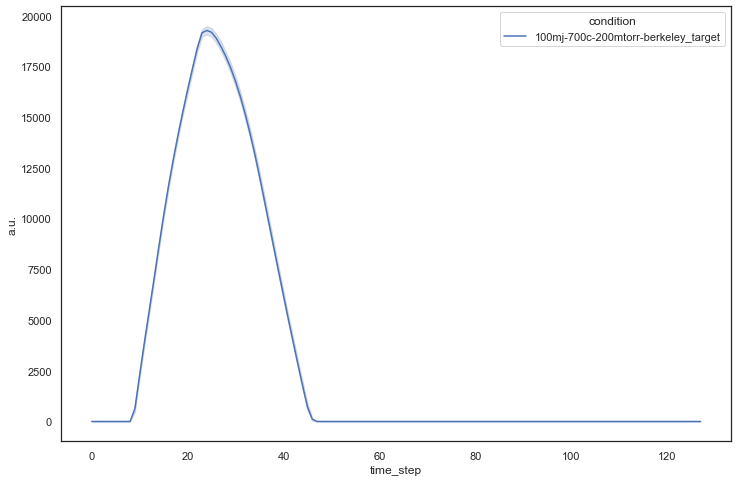

area_filled


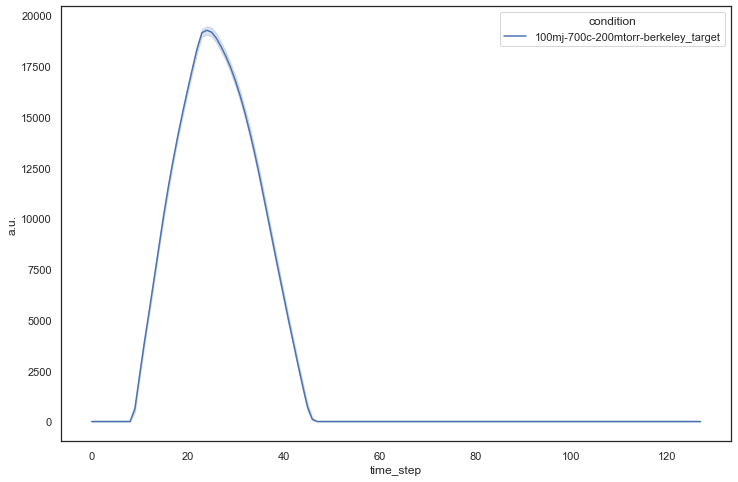

axis_major_length


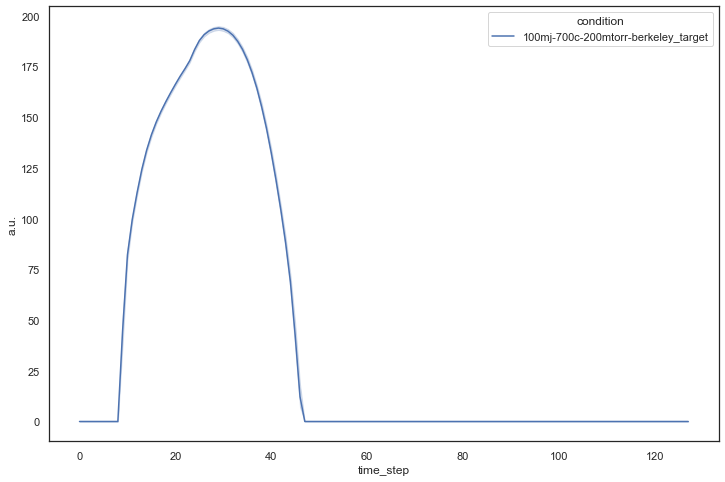

axis_minor_length


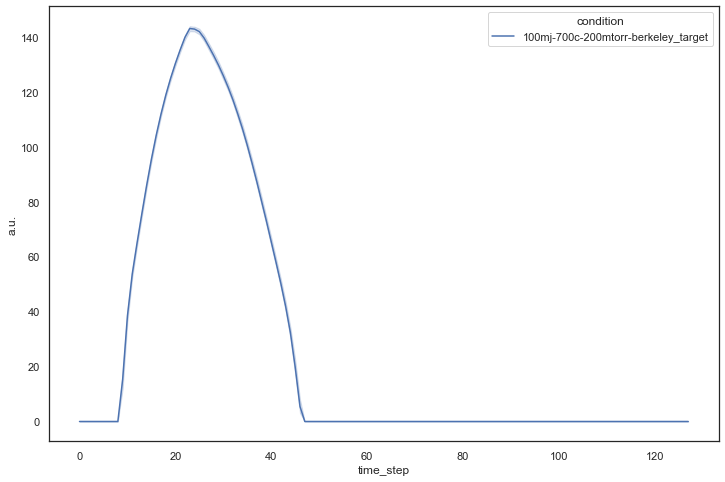

centroid-1


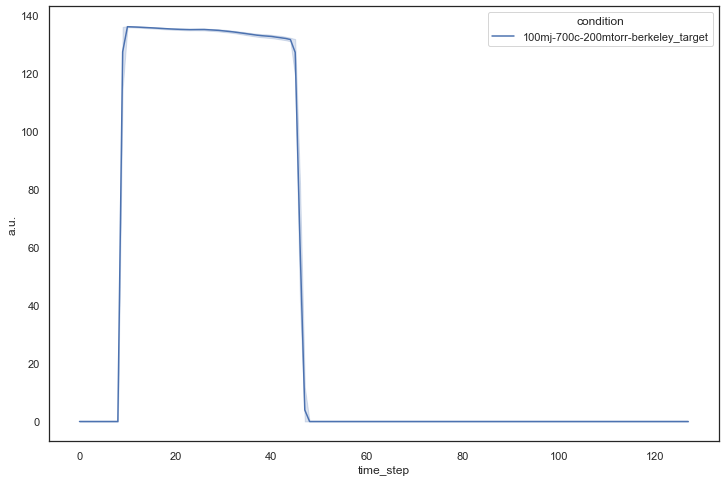

centroid-2


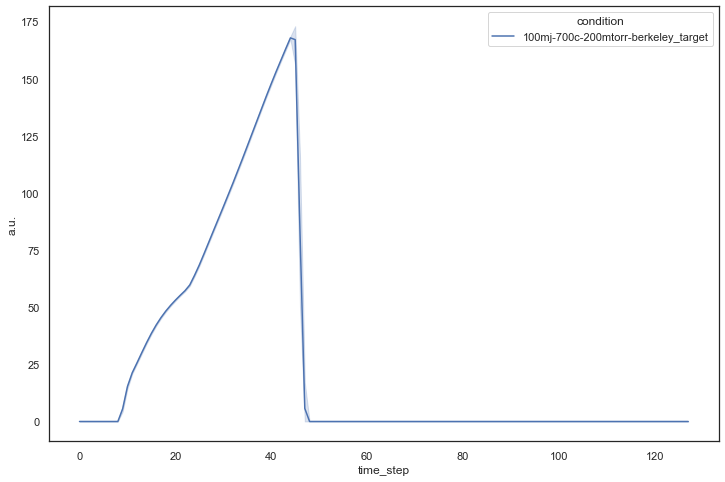

orientation


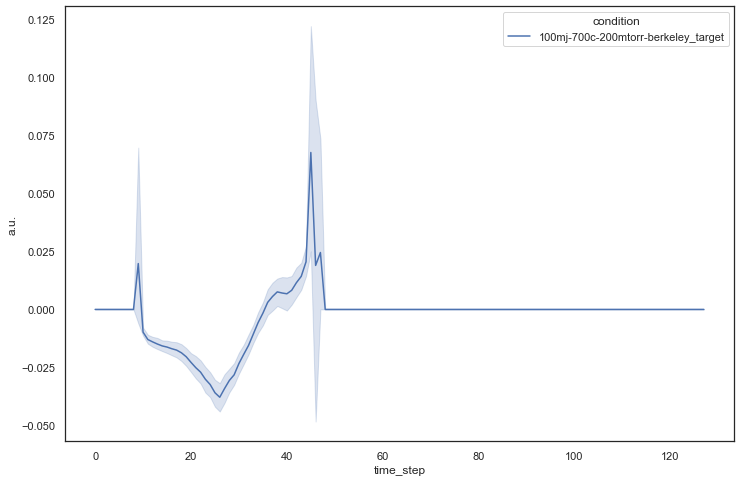

eccentricity


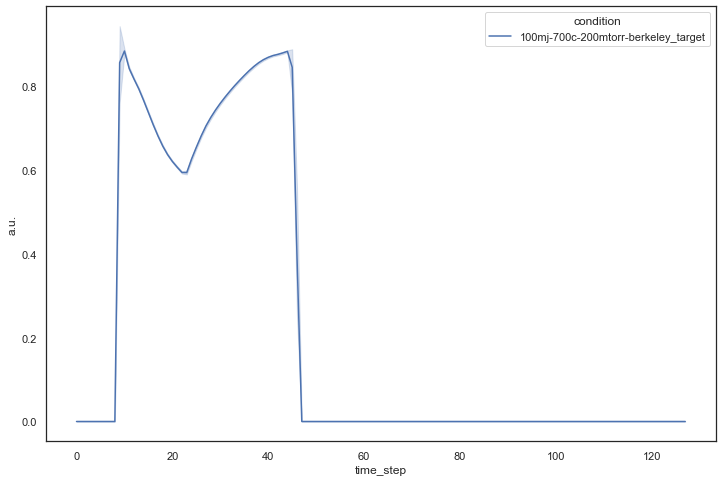

perimeter


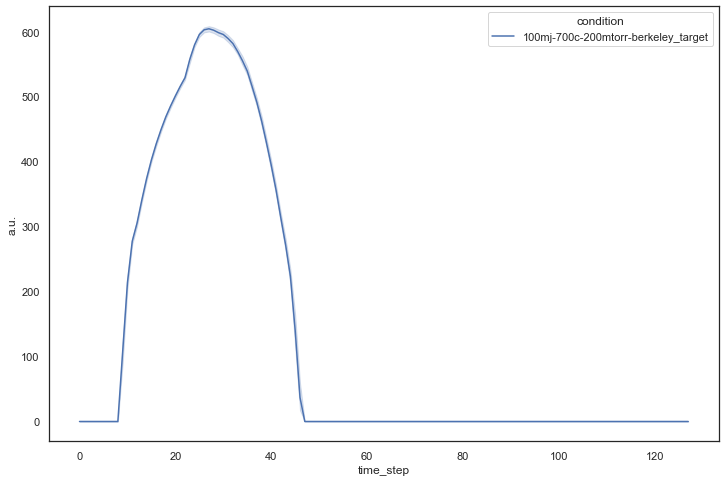

velocity


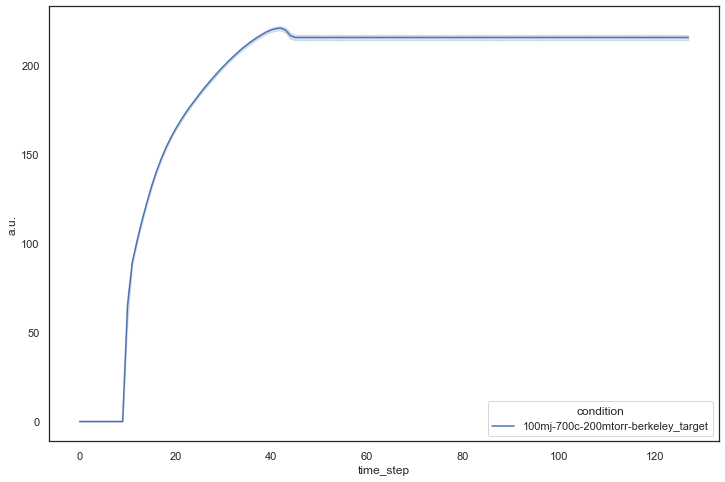

In [15]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
                'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
                'eccentricity', 'perimeter', 'velocity'] 
plot_metrics(df, metrics_name, label_with='condition')

area


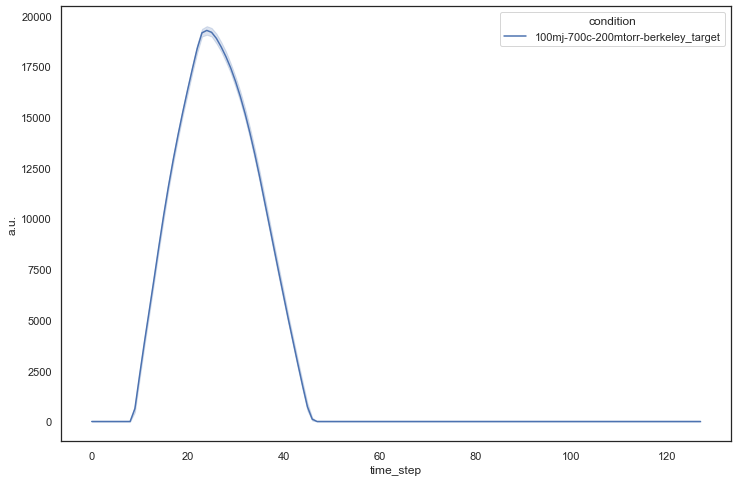

area_filled


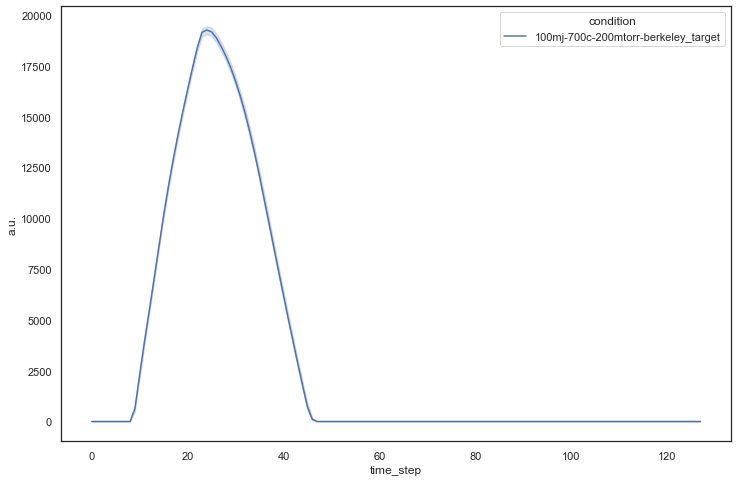

axis_major_length


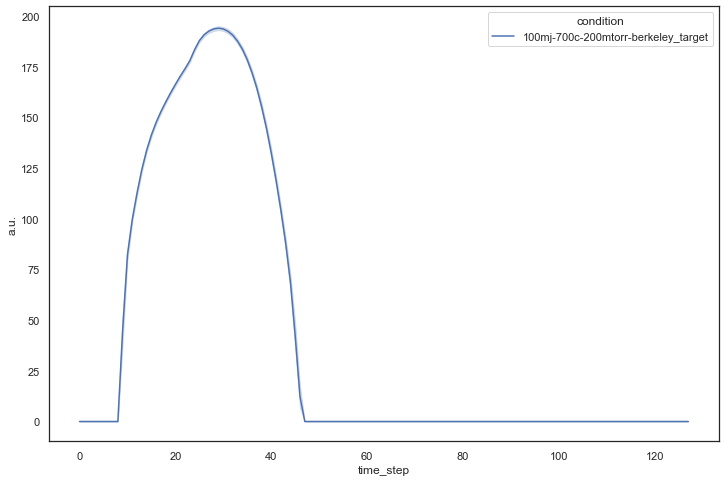

axis_minor_length


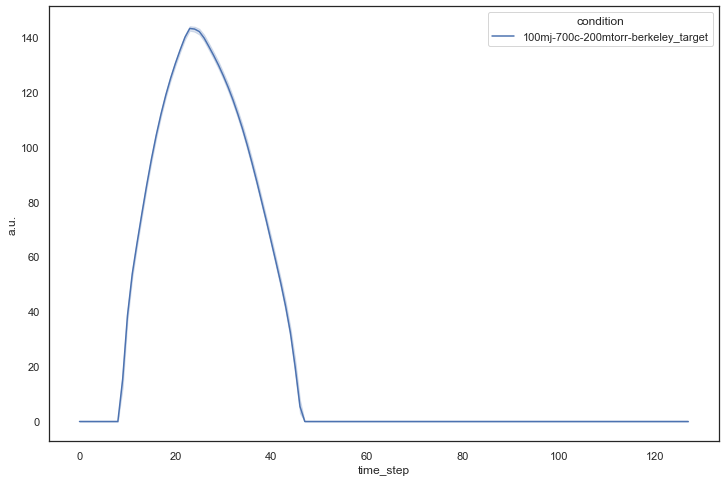

centroid-1


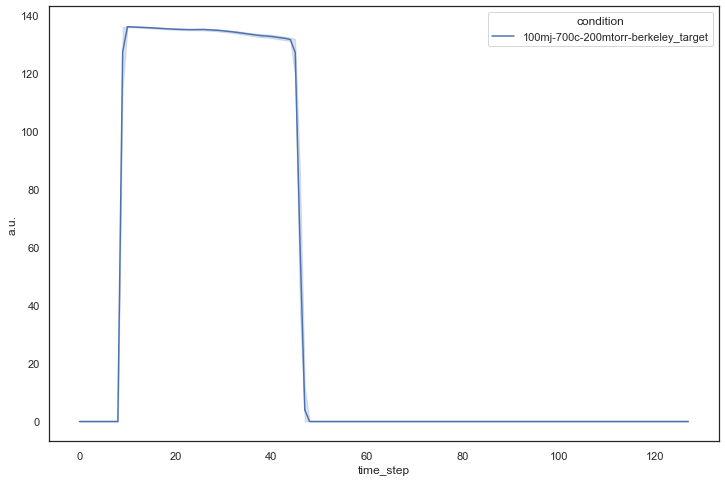

centroid-2


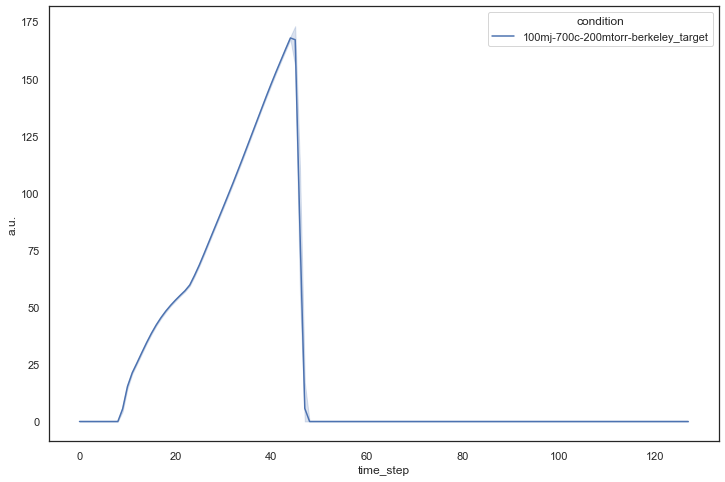

orientation


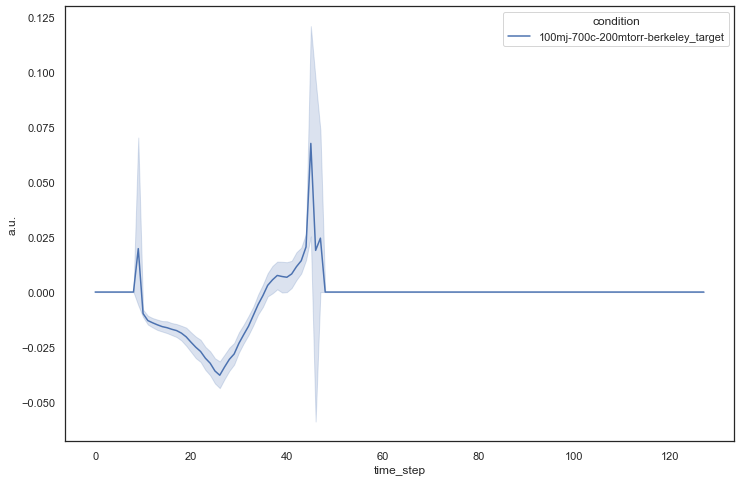

eccentricity


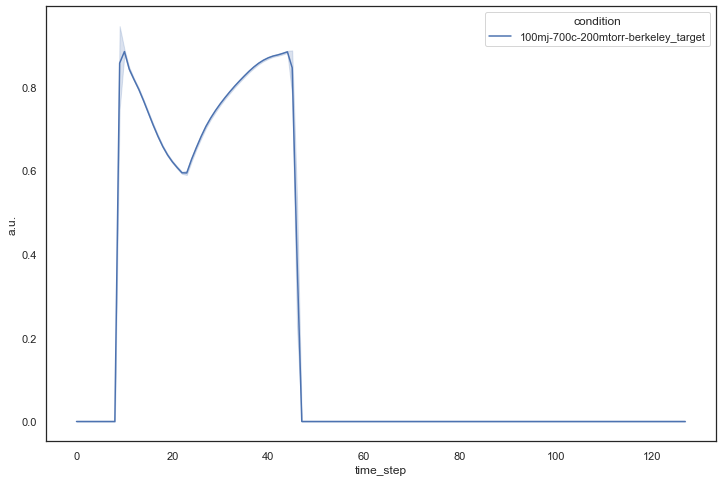

perimeter


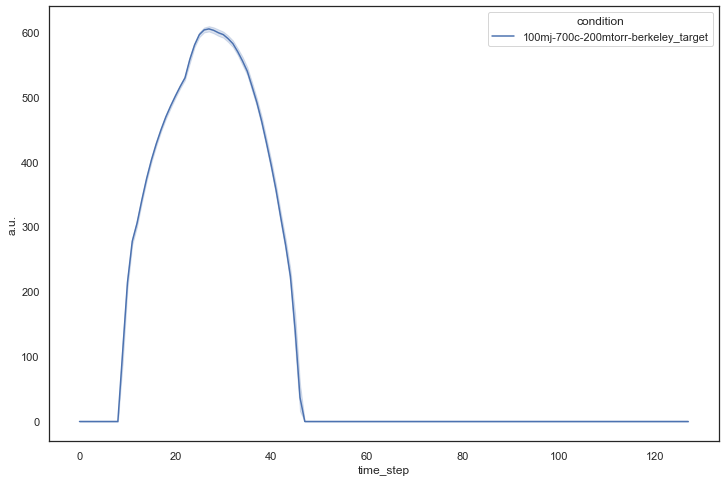

velocity


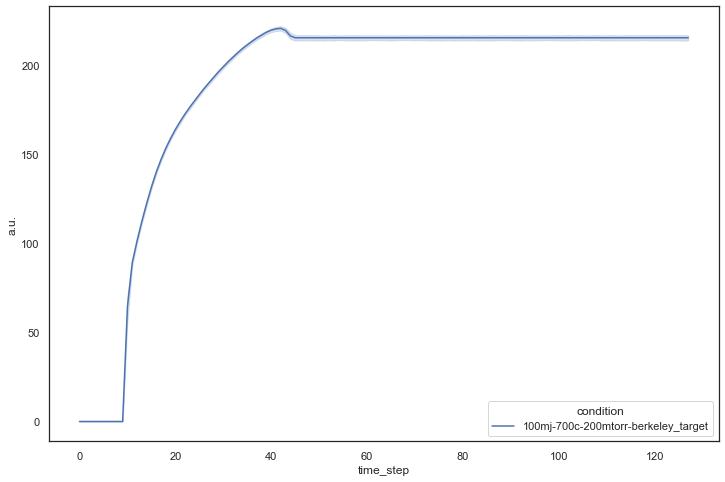

In [11]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
                'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
                'eccentricity', 'perimeter', 'velocity'] 

for metric in metrics_name:
    print(metric)
    sns.set(rc={'figure.figsize':(12,8)})
    sns.set_style("white")

    plot = sns.lineplot(data=df[df['metric']==metric], 
                        x='time_step', y='a.u.', hue='condition')
    plt.show()